In [10]:
#pulling in data
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from datetime import datetime
import glob
import os

# read by default 1st sheet of an excel file
# dataframes = pd.read_excel(
#     "../data/validation_raw/StemFlowVolumes.xlsx",
#     sheet_name=None,
# )
# rain_data = pd.read_excel(
#     "../data/validation_raw/2020_Secrest_Hydromet_Data_Volumes.xlsx",
#     sheet_name=None,
# )



# Get a list of all the csv files in the target directory
stats_files = glob.glob('../data/output/statistics/*.csv')


# flow_files = glob.glob('../data/output/flows/*.csv')
print(flow_files)
print(flow_files[0])
# Read and combine all the csv files into a single dataframe
# ex flow file
# data/output/flows/Secrest32-14_000000_flows_0.1666_flows.csv
# ex stats file
# data/output/statistics/Secrest32-06_000000_1_-0.8_statistics.csv
# data/output/statistics/Secrest32-06_000000_-0.8_statistics.csv




#Throws alot of warnings since the last column, time stamp gets dropped off since it doesnt have a col name
def get_file_name_attrs(file_list,remove_zeros, flows):
    file_names = [(f,os.path.basename(f).replace('_1_','_')) for f in file_list]
    to_remove_from_name = ['_flows','_statistics','.csv','_flows']
    for rem_string in to_remove_from_name:
        file_names = [(x,y.replace(rem_string,'')) for x,y in file_names]
    flow_cols = ["num_cylinders","projected_area","surface_area","angle_sum","volume","sa_to_vol","drip_node_id","drip_node_loc",'timestamp']
    stats_cols = ["total_psa","psa_w_overlap","stem_psa","stem_psa_w_overlap","tot_surface_area","stem_surface_area","tot_hull_area","tot_hull_boundary","stem_hull_area","stem_hull_boundary","num_drip_points","max_bo","topQuarterTotPsa","topHalfTotPsa","topThreeQuarterTotPsa","TotalShade","top_quarter_shade","top_half_shade","top_three_quarter_shade","DBH","volume","X_max","Y_max","Z_max","X_min","Y_min","Z_min","Order_zero_angle_avg","Order_zero_angle_std","Order_one_angle_avg","Order_one_angle_std","Order_two_angle_avg","Order_two_angle_std","Order_three_angle_avg","Order_three_angle_std","order_gr_four_angle_avg","order_gr_four_angle_std","file_name","timestamp"]
    if remove_zeros: 
        if flows:
            name_parts = [(name.split('_000000_')[0], name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=flow_cols,skiprows=1 )) for f, name in file_names if '_000000_' in name]
        else:
            name_parts = [(name.split('_000000_')[0], name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=stats_cols,skiprows=1  )) for f, name in file_names if '_000000_' in name]
    else:
        if flows:
            name_parts = [(name.split('_000000_')[0] + '_000000', name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=flow_cols,skiprows=1)) for f, name in file_names if '_000000_' in name]
        else:
            name_parts = [(name.split('_000000_')[0] + '_000000', name.split('_000000_')[1], pd.read_csv(f,index_col=False,names=stats_cols,skiprows=1)) for f, name in file_names if '_000000_' in name]

    # print(name_parts)
    return name_parts

# get_file_name_attrs()

# Read each
all_tree_stats = pd.DataFrame()
print(all_tree_stats.size)
dfs_and_cases = get_file_name_attrs(stats_files, remove_zeros = False, flows = False)
print(len(dfs_and_cases))

file_names = []
dfs=[]
for idx, tup in enumerate(dfs_and_cases):
    file_name, case_name, df = tup
    df['file_name'] = file_name
    df['case_name'] = case_name
    df['join_field'] = f'{str(file_name)}_{str(case_name)}'
    file_names.append(file_name)
    dfs.append(df)
print(len(dfs))
print(dfs[0])
all_tree_stats = pd.concat(dfs)

# print(all_tree_stats.size)
# print(len(all_tree_stats['file_name']))
# print(len(dfs_and_cases))

flow_dfs_and_cases = get_file_name_attrs(flow_files, remove_zeros = False, flows = True)
flow_dfs = []

for idx, tup in enumerate(flow_dfs_and_cases):
    # print(tup)
    file_name, case_name, df = tup
    df['file_name'] = file_name
    df['case_name'] = case_name
    df['join_field'] = f'{str(file_name)}_{str(case_name)}'
    is_stem = [cyl_id==0 for cyl_id in df['drip_node_id']]
    df['is_stem'] = is_stem
    flow_dfs.append(df)


all_tree_flows = pd.concat(flow_dfs)

# 1041460
# 161234


# print(len(all_tree_flows['file_name']))
# print(len(all_tree_stats['case_name']))
# print(len(dfs_and_cases))
# print(len(flow_dfs_and_cases))



['../data/output/flows/Secrest18-13_000000_flows_-0.95_flows.csv', '../data/output/flows/Secrest32-06_000000_flows_0.6_flows.csv', '../data/output/flows/Secrest27-05_000000_flows_0.5_flows.csv', '../data/output/flows/Secrest11-27_000000_flows_-1.5_flows.csv', '../data/output/flows/Secrest32-03_000000_flows_-1.5_flows.csv', '../data/output/flows/Secrest11-27_000000_flows_-0.9_flows.csv', '../data/output/flows/Secrest31-05_000000_flows_-0.16666_flows.csv', '../data/output/flows/Secrest18-13_000000_flows_-1_flows.csv', '../data/output/flows/Secrest10-02_000000_flows_0.36666_flows.csv', '../data/output/flows/Secrest32-03_000000_flows_0.1666_flows.csv', '../data/output/flows/Secrest24-03_000000_flows_-0.95_flows.csv', '../data/output/flows/Secrest32-06_000000_flows_-2.0_flows.csv', '../data/output/flows/Secrest31-05_000000_flows_-1_flows.csv', '../data/output/flows/Secrest10-08_000000_flows_0.1666_flows.csv', '../data/output/flows/Secrest14-09_000000_flows_-0.0666_flows.csv', '../data/outpu

In [ ]:
print()

In [12]:
#getting cases that we have already run a sensitivity analysis on
# arr = [x for x in all_tree_stats[['file_name', 'case_name']].values]
arr = [x for x in all_tree_stats[['file_name', 'case_name']].values]

tups = [(x, float(y)) for x,y in arr]
already_run = tups
# print(all_tree_stats)
print(tups)

[('Secrest02-30_000000', -0.2666), ('Secrest08-24c_000000', -1.5), ('Secrest02-30_000000', -1.0), ('Secrest32-06_000000', -0.82), ('Secrest03-12_000000', -0.3), ('Secrest10-08_000000', 0.1666), ('Secrest32-06_000000', -0.78), ('Secrest07-32_000000', 0.1666), ('Secrest24-03_000000', -0.95), ('Secrest32-06_000000', -0.33333), ('Secrest27-05_000000', -0.32), ('Secrest02-30_000000', -0.3), ('Secrest32-06_000000', 0.7), ('Secrest29-25_000000', -1.5), ('Secrest32-06_000000', 0.26), ('Secrest32-06_000000', 0.82), ('Secrest32-06_000000', 0.28), ('Secrest07-32_000000', -1.0), ('Secrest23-23_000000', 0.0), ('Secrest02-30_000000', -0.16666), ('Secrest32-06_000000', -0.8), ('Secrest02-26_000000', 0.0), ('Secrest32-03_000000', -0.0666), ('Secrest32-03_000000', -0.16666), ('Secrest31-05_000000', -2.0), ('Secrest24-03_000000', -0.0666), ('Secrest32-06_000000', 0.3666), ('Secrest10-02_000000', 0.0), ('Secrest10-08_000000', -0.3), ('Secrest27-05_000000', -1.0), ('Secrest18-13_000000', -0.16666), ('Secr

In [19]:
arr =[x for x in all_tree_stats[['join_field', 'case_name']].values]
[(x, float(y)) for x,y in arr]

[('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_000000_0.6', 0.6),
 ('Secrest32-06_0000

In [73]:
#Description of the validation data analyisis 

# We want to graph correlations between the following extracted
# traits and the volume, depth and yield of flow:
# total_psa, stem_psa, stem_psa_w_overlap, total_surface_area, stem_surface_area
# total_hull_area, stem_hull_area, Total_WAI, stem_WAI,
# DBH, some combination of stem angles

# But first... Data Prep

# Our model hypothesis is that, **assuming initial saturation**, (projected area - overlap) of the stem component will be
# correlated to total stem flow volume. Perhaps there will also be a correlation between surface
# area and stem flow yield or rate

# Cleaning
# Goals:
#   - Reduce the effect of the confounding variables:
#       - Data inaccuracy (for various reasons )
#       - Saturation level varying by tree
#       -
# Methodology:
#   - Identify rain events that did not lead to saturation (varies by tree)
#   - Scrub data for rain events for which no data is available
#   - Normalize the data based on saturation point
#       - *x-axis of mm since Saturation or time since saturation
#   - ?Perhaps adjust for tree pheological traits (species bark roughness?)
#
# Metrics
# - R-squared - The coefficent of determination,


         Date  Rain  Z. serrata  L. styraciflua  A. platanoides  \
7  2020-05-08   0.2        0.00            0.00            0.00   
15 2020-09-09   0.2        0.00            0.00            0.00   
20 2020-04-10   0.3        0.00            0.00            0.00   
9  2020-08-17   0.4        0.00            0.00            0.00   
19 2020-01-10   0.5        0.00            0.00            0.00   
4  2020-02-08   1.1        0.00            0.00            0.00   
18 2020-09-29   1.2        0.00            0.00            0.00   
1  2020-07-28   1.4        0.00            0.00            0.00   
31 2022-10-15   2.2        0.39            0.38            0.00   
2  2020-01-08   2.6        0.00            0.00            0.00   
13 2020-05-09   3.5        0.00            0.00            0.00   
16 2020-09-13   6.6        0.04            0.00            0.00   
32 2022-10-19   7.1        0.01            0.00            0.00   
10 2020-08-26   8.0        0.01            0.00            0.0

In [5]:
# set up - defining the validation ration fields
# tree_name = 'A. platanoides'

# Read datasets (excel sheets) into dataframes
rain_intensity = rain_data["Duration"]
volume = dataframes["Volume"]
depth = dataframes["Depth"]
tree_traits = dataframes["Mapping"]

# Set indexes to easily access rows/join data sets
tree_traits.set_index("Species", inplace=True)
depth.set_index("Date", inplace=True)
volume.set_index("Date", inplace=True)
rain_intensity.set_index("Date", inplace=True)




tot_psa = dataframes["Mapping"]["total_psa"].T
stem_psa = dataframes["Mapping"]["stem_psa"].T

tot_surface_area = dataframes["Mapping"]["tot_surface_area"].T
stem_surface_area = dataframes["Mapping"]["stem_surface_area"].T

tot_hull_area = dataframes["Mapping"]["tot_hull_area"].T
stem_hull_area = dataframes["Mapping"]["stem_hull_area"].T

dbh = dataframes["Mapping"]["DBH"].T

Order_zero_angle_avg = dataframes["Mapping"]["Order_zero_angle_avg"].T
Order_two_angle_avg = dataframes["Mapping"]["Order_two_angle_avg"].T


vol_over_tpsa = volume.div(tot_psa)
vol_over_spsa = volume.div(stem_psa)
vol_over_tsa =  volume.div(tot_surface_area)
vol_over_ssa =  volume.div(stem_surface_area)
vol_over_tha =  volume.div(tot_hull_area)
vol_over_sha =  volume.div(stem_hull_area)
vol_over_dbh =  volume.div(dbh)
vol_over_oza =  volume.div(Order_zero_angle_avg)
vol_over_ota =  volume.div(Order_two_angle_avg)
test = volume

date_fix_dict = {
    datetime(2020, 1, 8): datetime(2020, 8, 1),
    datetime(2020, 3, 8): datetime(2020, 8, 3),
    datetime(2020, 4, 8): datetime(2020, 8, 4),
    datetime(2020, 5, 8): datetime(2020, 8, 5),
    datetime(2020, 6, 8): datetime(2020, 9, 6),
    datetime(2020, 7, 9): datetime(2020, 9, 7),
    datetime(2022, 1, 8): datetime(2020, 8, 1),
    datetime(2022, 3, 8): datetime(2020, 8, 3),
    datetime(2022, 4, 8): datetime(2020, 8, 4),
    datetime(2022, 5, 8): datetime(2020, 8, 5),
    datetime(2022, 6, 8): datetime(2020, 9, 6),
    datetime(2022, 7, 9): datetime(2020, 9, 7),
    datetime(2020, 1, 10): datetime(2020, 10, 1),
    datetime(2020, 4, 10): datetime(2020, 10, 4),
    datetime(2022, 2, 8): datetime(2022, 8, 2),
    datetime(2022, 11, 8): datetime(2022, 8, 11),
    datetime(2022, 9, 10): datetime(2022, 9, 10),
    datetime(2022, 2,11): datetime(2022, 11, 2),
    datetime(2022, 1, 10): datetime(2020, 10, 1),
    datetime(2022, 4, 10): datetime(2020, 10, 4),
    datetime(2020, 2, 8): datetime(2022, 8, 2),
    datetime(2020, 11, 8): datetime(2022, 8, 11),
    datetime(2020, 9, 10): datetime(2022, 9, 10),
    datetime(2020, 2,11): datetime(2022, 11, 2),
}

print(date_fix_dict.get("2020-01-08"))
# date_fix_dict = {v:k for k,v in date_fix_dict.items()}
# print(date_fix_dict)
# print(date_fix_dict.get('2020-01-08'))

print(volume.index)
print(volume.index.map(lambda x: date_fix_dict.get(x, x)))
volume.index = volume.index.map(lambda x: date_fix_dict.get(x, x))
print(depth.index)
print(depth.index.map(lambda x: date_fix_dict.get(x, x)))
depth.index = depth.index.map(lambda x: date_fix_dict.get(x, x))


volume_w_intensity = volume.join(rain_data['Duration'], how='left',on='Date')
depth_w_intensity = depth.join(rain_data['Duration'], how='left',on='Date')

# tree_metrics = dataframes['Mapping'].loc[[tree_name]]
rain_sorted_vol = volume_w_intensity.sort_values(by=["Rain"]).query("Rain>0")
# rain_sorted_vol   = volume.sort_values(by=['Rain']).replace(0, np.nan)

# rain_sorted_vol.replace(0, np.nan, inplace=True)

rain_sorted_depth = depth_w_intensity.sort_values(by=["Rain"]).query("Rain>0")
# rain_sorted_depth.replace(0, np.nan, inplace=True)
# rain_sorted_depth = depth.sort_values(by=['Rain']).replace(0, np.nan)




None
DatetimeIndex(['2020-07-27', '2020-07-28', '2020-01-08', '2020-01-08',
               '2020-02-08', '2020-03-08', '2020-04-08', '2020-05-08',
               '2020-08-16', '2020-08-17', '2020-08-26', '2020-08-27',
               '2020-08-28', '2020-05-09', '2020-07-09', '2020-09-09',
               '2020-09-13', '2020-09-28', '2020-09-29', '2020-01-10',
               '2020-04-10', '2022-09-06', '2022-06-17', '2022-07-07',
               '2022-07-14', '2022-07-19', '2022-02-08', '2022-11-08',
               '2022-08-23', '2022-10-09', '2022-09-28', '2022-10-15',
               '2022-10-19', '2022-02-11', '2022-02-11'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2020-07-27', '2020-07-28', '2020-08-01', '2020-08-01',
               '2022-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-16', '2020-08-17', '2020-08-26', '2020-08-27',
               '2020-08-28', '2020-05-09', '2020-09-07', '2020-09-09',
               '2020-09

In [6]:
#summarizing the flow data


stem_flows = all_tree_flows[all_tree_flows['is_stem']]
drip_flows = all_tree_flows[all_tree_flows['is_stem']==False]
drip_grouped = drip_flows.groupby(['file_name','case_name'])
stem_grouped = drip_flows.groupby(['file_name','case_name'])
drip_stats = [{'join_field': f'{group[0][0]}_{group[0][1]}',
                'drip_avg_num_cyls' :np.mean(group[1]['num_cylinders']), 
                'drip_avg_pa' :np.sum(group[1]['projected_area']),
                'drip_avg_sa' :np.sum(group[1]['surface_area'])} for group in drip_grouped]

stem_stats = [{'join_field': f'{group[0][0]}_{group[0][1]}',
                'stem_avg_num_cyls' :np.mean(group[1]['num_cylinders']), 
                'stem_avg_pa' :np.sum(group[1]['projected_area']),
                'stem_avg_sa' :np.sum(group[1]['surface_area'])} for group in stem_grouped]
print(drip_stats)
print(stem_stats)

drip_df = pd.DataFrame(drip_stats)

# w_flow_stats = all_tree_stats.join(drip_df, how='left', on= 'join_field', lsuffix='stats',rsuffix='drip')
w_flow_stats = all_tree_stats.set_index('join_field').join(drip_df.set_index('join_field'))
w_flow_stats.sort_values(by=["join_field"])
# w_flow_stats

# print(all_tree_stats['join_field'])
# print(all_tree_flows['join_field'])





[{'join_field': 'Secrest02-26_000000_-0.16666', 'drip_avg_num_cyls': 5.515110683349374, 'drip_avg_pa': 22.39077509521838, 'drip_avg_sa': 84.02844293319338}, {'join_field': 'Secrest02-26_000000_-0.3', 'drip_avg_num_cyls': 6.242305173542895, 'drip_avg_pa': 22.076154979176067, 'drip_avg_sa': 82.75369540844416}, {'join_field': 'Secrest02-26_000000_-1', 'drip_avg_num_cyls': 7.185499673416068, 'drip_avg_pa': 6.878564808850549, 'drip_avg_sa': 26.006551044802357}, {'join_field': 'Secrest02-26_000000_-1.5', 'drip_avg_num_cyls': 5.4, 'drip_avg_pa': 0.10334538062702656, 'drip_avg_sa': 0.4508262501439929}, {'join_field': 'Secrest02-26_000000_0', 'drip_avg_num_cyls': 4.784628237259816, 'drip_avg_pa': 23.032762393395746, 'drip_avg_sa': 86.11739987331825}, {'join_field': 'Secrest02-26_000000_0.1666', 'drip_avg_num_cyls': 4.245804247735037, 'drip_avg_pa': 23.965768006466288, 'drip_avg_sa': 89.10163927433865}, {'join_field': 'Secrest02-30_000000_-0.0666', 'drip_avg_num_cyls': 6.341210747814827, 'drip_a

,total_psa,psa_w_overlap,stem_psa,stem_psa_w_overlap,tot_surface_area,stem_surface_area,tot_hull_area,tot_hull_boundary,stem_hull_area,stem_hull_boundary,...,Order_two_angle_std,Order_three_angle_avg,Order_three_angle_std,order_gr_four_angle_avg,order_gr_four_angle_std,file_name,case_name,drip_avg_num_cyls,drip_avg_pa,drip_avg_sa
join_field,,,,,,,,,,,,,,,,,,,,,
Secrest02-26_000000_-0.16666,21.481929,39.169550,3.569841,13.635754,126.483307,31.130292,80.624263,38.718868,17.908670,25.796981,...,0.688357,0.100721,0.690122,0.091892,0.691350,Secrest02-26_000000,-0.16666,5.515111,22.390775,84.028443
Secrest02-26_000000_-0.3,21.481929,39.169550,4.866214,15.395048,126.483307,37.225882,80.624263,38.718868,17.908670,25.796981,...,0.688357,0.100721,0.690122,0.091892,0.691350,Secrest02-26_000000,-0.3,6.242305,22.076155,82.753695
Secrest02-26_000000_-1,21.481929,39.169550,16.690953,31.828909,126.483307,97.214573,80.624263,38.718868,77.193718,38.300469,...,0.688357,0.100721,0.690122,0.091892,0.691350,Secrest02-26_000000,-1,7.185500,6.878565,26.006551
Secrest02-26_000000_-1.5,21.481929,39.169550,21.421139,39.063307,126.483307,125.932878,80.624263,38.718868,80.624263,38.718868,...,0.688357,0.100721,0.690122,0.091892,0.691350,Secrest02-26_000000,-1.5,5.400000,0.103345,0.450826
Secrest02-26_000000_0,21.481929,39.169550,2.978626,12.299297,126.483307,27.071208,80.624263,38.718868,13.219509,27.389909,...,0.688357,0.100721,0.690122,0.091892,0.691350,Secrest02-26_000000,0,4.784628,23.032762,86.117400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Secrest32-14_000000_-0.3,84.652671,172.303166,28.781743,69.548079,527.409519,181.218384,204.236647,73.033909,41.301745,55.101799,...,0.648167,0.081489,0.680423,0.059430,0.650967,Secrest32-14_000000,-0.3,5.948555,98.350614,327.101279
Secrest32-14_000000_-1,84.652671,172.303166,62.626094,125.148304,527.409519,361.881753,204.236647,73.033909,182.142086,72.419934,...,0.648167,0.081489,0.680423,0.059430,0.650967,Secrest32-14_000000,-1,9.587859,43.840816,149.393393
Secrest32-14_000000_-1.5,84.652671,172.303166,83.340302,168.858014,527.409519,515.435394,204.236647,73.033909,203.880362,73.515154,...,0.648167,0.081489,0.680423,0.059430,0.650967,Secrest32-14_000000,-1.5,43.954545,3.396659,11.548592


In [7]:
#Generating proportion fields for sensitivity stats
from IPython.display import display
all_tree_stats_raw = all_tree_stats
all_tree_stats_raw['vol_over_tps'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['total_psa'])
all_tree_stats_raw['vol_over_sps'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['stem_psa'])    
all_tree_stats_raw['vol_over_tsa'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['tot_surface_area'])   
all_tree_stats_raw['vol_over_ssa'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['stem_surface_area'])
all_tree_stats_raw['vol_over_tha'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['tot_hull_area'])
all_tree_stats_raw['vol_over_sha'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['stem_hull_area'])
all_tree_stats_raw['vol_over_dbh'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['DBH'])
all_tree_stats_raw['vol_over_oza'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['Order_zero_angle_avg'])
all_tree_stats_raw['vol_over_ota'] = all_tree_stats_raw['volume'].div(all_tree_stats_raw['Order_two_angle_avg'])
print(all_tree_stats_raw[['volume', 'total_psa', 'vol_over_tps', 'stem_psa', 'vol_over_sps']])
# # Display the first few rows of the dataframe

all_tree_stats = all_tree_stats.dropna(axis=1, how='all')
all_tree_stats = all_tree_stats.sort_values(by=['file_name', 'case_name'])
#        'Order_three_angle_std', 'order_gr_four_angle_avg',
#        'order_gr_four_angle_std', 'file_name', 'case_name']
all_tree_flows = all_tree_flows.sort_values(by=['file_name', 'case_name'])
# w_flow_stats = all_tree_stats.join(all_tree_flows['average'], how='left',on=['file_name', 'case_name'])
# w_flow_stats

      volume  total_psa  vol_over_tps   stem_psa  vol_over_sps
0   1.216385  19.514840      0.062331   6.668127      0.182418
0   1.282579  18.179638      0.070550  18.168635      0.070593
0   1.216385  19.514840      0.062331  15.992481      0.076060
0   4.731001  42.885446      0.110317  36.623392      0.129180
0   2.674013  22.519951      0.118740   6.667386      0.401059
..       ...        ...           ...        ...           ...
0   2.674013  22.519951      0.118740  16.276735      0.164284
0   1.493589  18.045974      0.082766  18.045974      0.082766
0   4.731001  42.885446      0.110317  38.343742      0.123384
0   1.515995  21.422185      0.070768   1.433779      1.057342
0   4.731001  42.885446      0.110317  42.885446      0.110317

[305 rows x 5 columns]


In [8]:
#testing out filtering the all tree stats dataset 
all_tree_stats.loc[ all_tree_stats['file_name']== 'Secrest32-06']

# set(all_tree_stats['file_name'])

,total_psa,psa_w_overlap,stem_psa,stem_psa_w_overlap,tot_surface_area,stem_surface_area,tot_hull_area,tot_hull_boundary,stem_hull_area,stem_hull_boundary,...,Order_one_angle_avg,Order_one_angle_std,Order_two_angle_avg,Order_two_angle_std,Order_three_angle_avg,Order_three_angle_std,order_gr_four_angle_avg,order_gr_four_angle_std,file_name,case_name


In [8]:
#Graphing some sensitivity analysis results
import numpy as np

def gaussian(x, a, b, c):
    """
    Used for fitting data using an gaussian curve
    Functions as an input to scipy curve_fit
    """
    y = a * np.exp(-1 * b * x**2) + c
    return y


def exponential(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * np.exp(b * x) + c


def quadratic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * x * x + b * x + c


def cubic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return x * x * x + a * x * x + b * x + c

def quartic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return x * x * x * x + a * x * x * x + b * x * x + c * x


def logrithmic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """

    return a * np.log(b * x) + c


def try_fit_func(fit_func, x , y, *args):
    func_name = fit_func.__name__
    coeff = []
    try:
        coeff, pcov = curve_fit(fit_func, x, y)  # , p0 = (1,1,2))#, *args)
    except RuntimeError:
        print(f"No {func_name} fit found. {len(coeff)}")

    if len(coeff) == 0:
        y_predicted, rsq = None, None
    else:
        print(f"{func_name} fit found. coeff ={coeff}.")
        y_predicted = fit_func(x, *coeff)
        print(f"x {x}")
        print(f"y {y}")
        print(f"y_predicted {y_predicted}")
        rsq = round(r2_score(y, y_predicted), 3)
        print(f"rsq = {rsq}, args = {args}")
    return y_predicted, rsq, func_name, coeff


def find_fit_func(fit_func, x, y):
    alt_fit_funcs = [quadratic, gaussian, cubic]
    # x_flitered = x[~np.isnan(x)]
    # y_filtered = y[~np.isnan(x)]
    # x_flitered = x[x>0]
    # y_filtered = y[x>0]
    # x_flitered = x[y_filtered>.1]
    # y_filtered = y[y_filtered>.1]
    x_flitered = x
    y_filtered = y

    y_predicted, rsq, fit_func_name, coeff = try_fit_func(
        fit_func, x_flitered, y_filtered
    )

    for alt_func in alt_fit_funcs:
        if len(coeff) != 0 and rsq > 0.2:
            print(
                f"""fff returning:
                  ~np.isnan(x) {~np.isnan(x)} 
                    x {x},
                    x_flitered {x_flitered},
                    y {y},
                    y_filtered {y_filtered}, 
                    y_predicted {y_predicted}"""
            )
            return x_flitered, y_predicted, rsq, fit_func_name, coeff
        else:
            y_predicted, rsq, fit_func_name, coeff = try_fit_func(
                alt_func, x_flitered, y_filtered
            )

    if len(coeff) == 0 or rsq < 0.2:
        fit_func_name = "None"
        y_predicted = y_filtered

    print(f"fff returning: x_flitered {x_flitered}, y_predicted {y_predicted}")
    return x_flitered, y_predicted, rsq, fit_func_name, coeff

{'Secrest07-32_000000', 'Secrest32-14_000000', 'Secrest32-06_000000', 'Secrest32-03_000000', 'Secrest11-27_000000', 'Secrest32-01_000000', 'Secrest27-05_000000'}


/tmp/ipykernel_2125/4157704502.py:55: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x, y, 2)
/code/code/canopyHydrodynamics/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/tmp/ipykernel_2125/4157704502.py:55: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x, y, 2)
/code/code/canopyHydrodynamics/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/tmp/ipykernel_2125/4157704502.py:55: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x, y, 2)
/code/code/canopyHydrodynamics/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

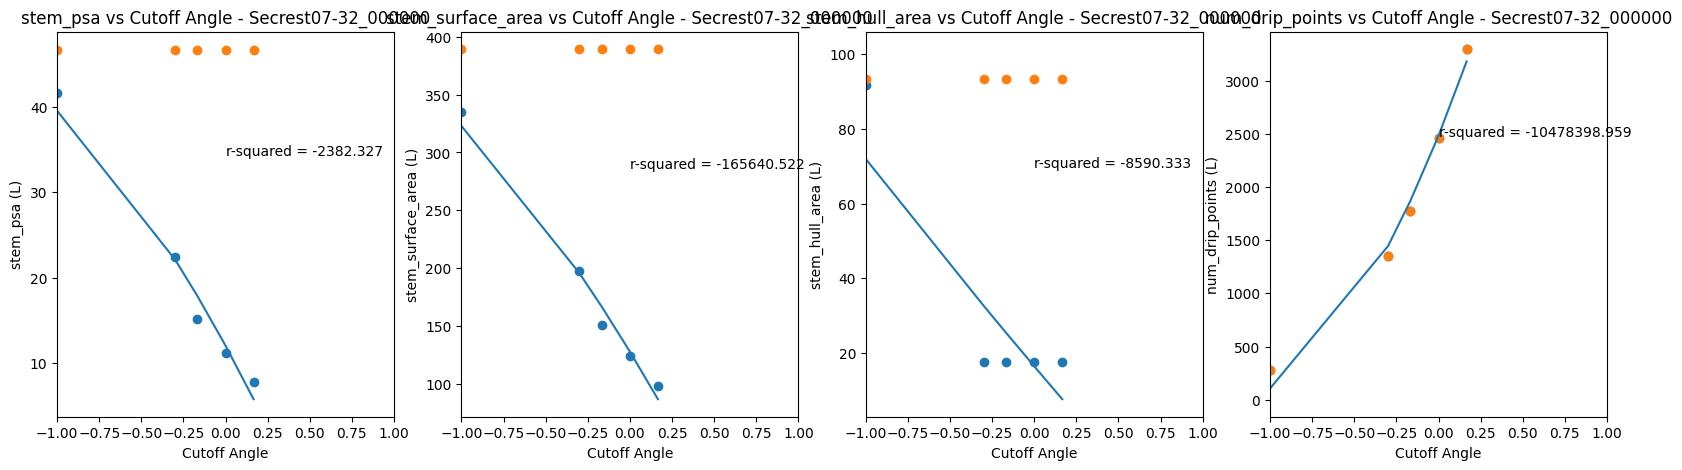

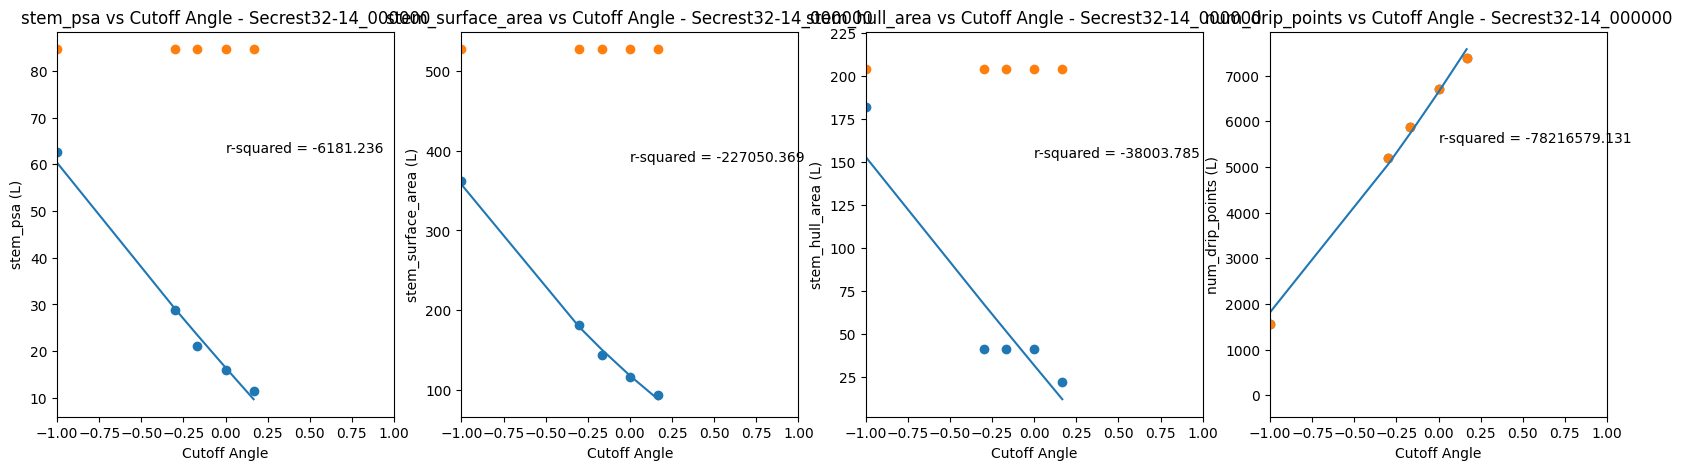

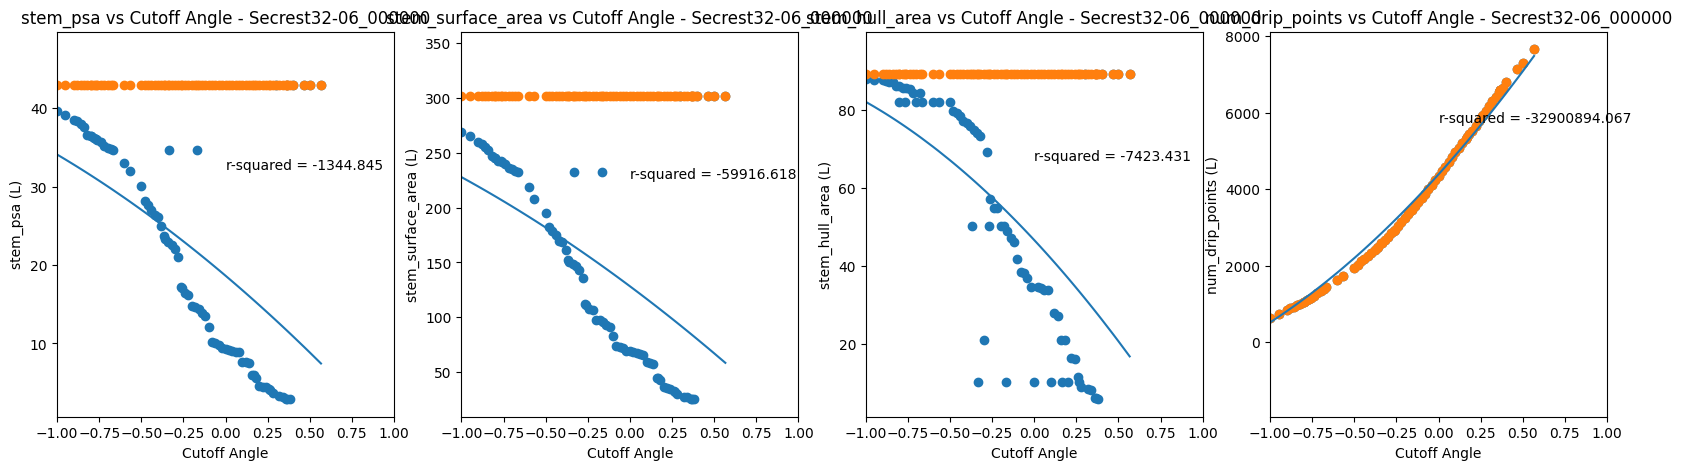

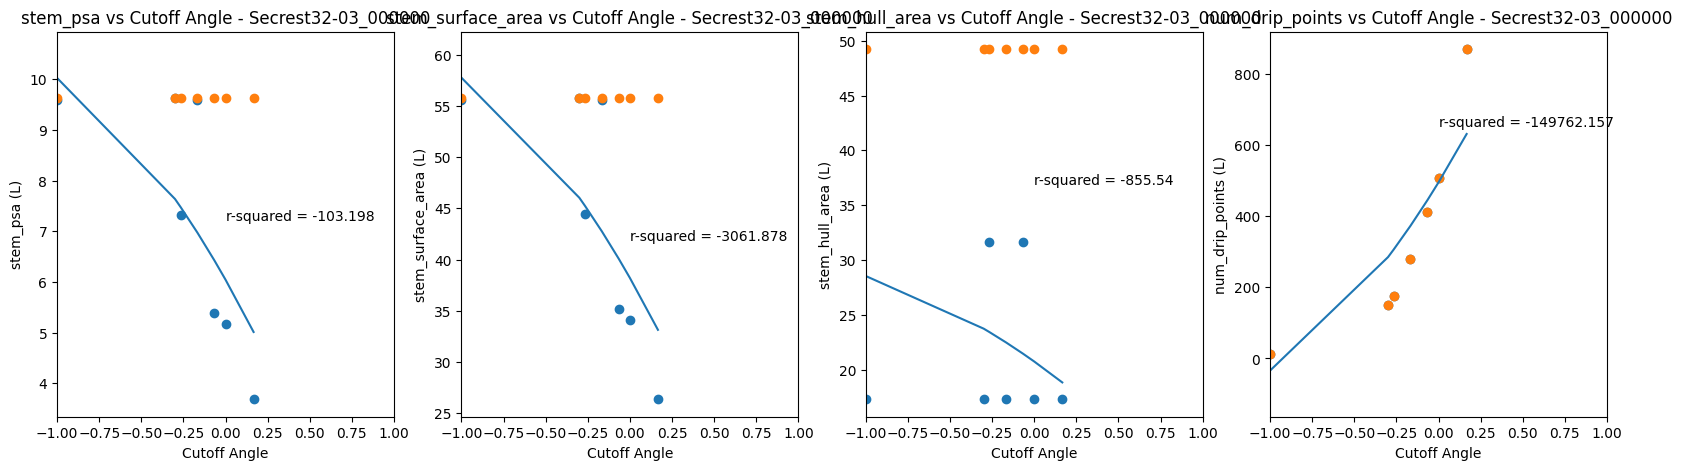

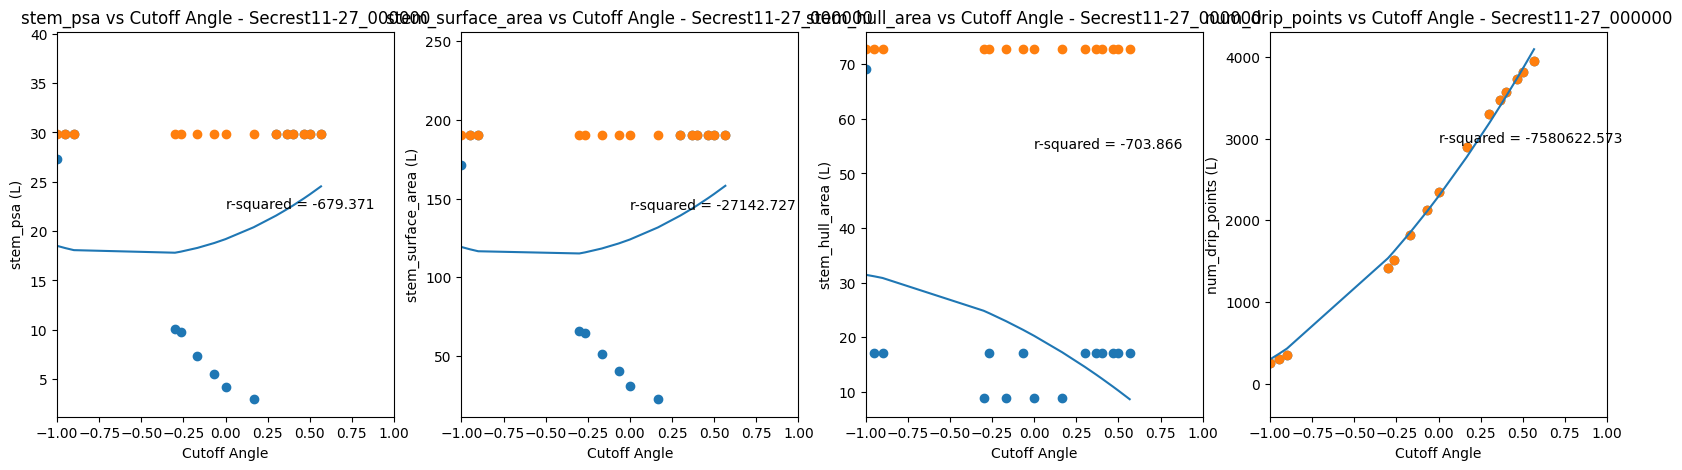

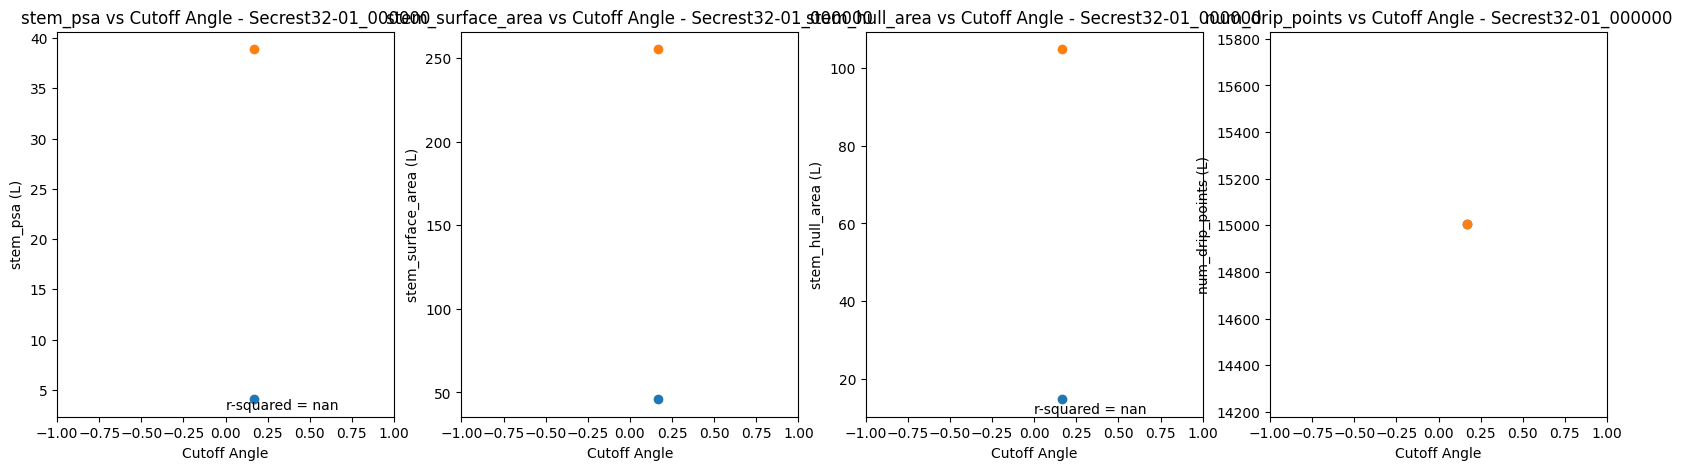

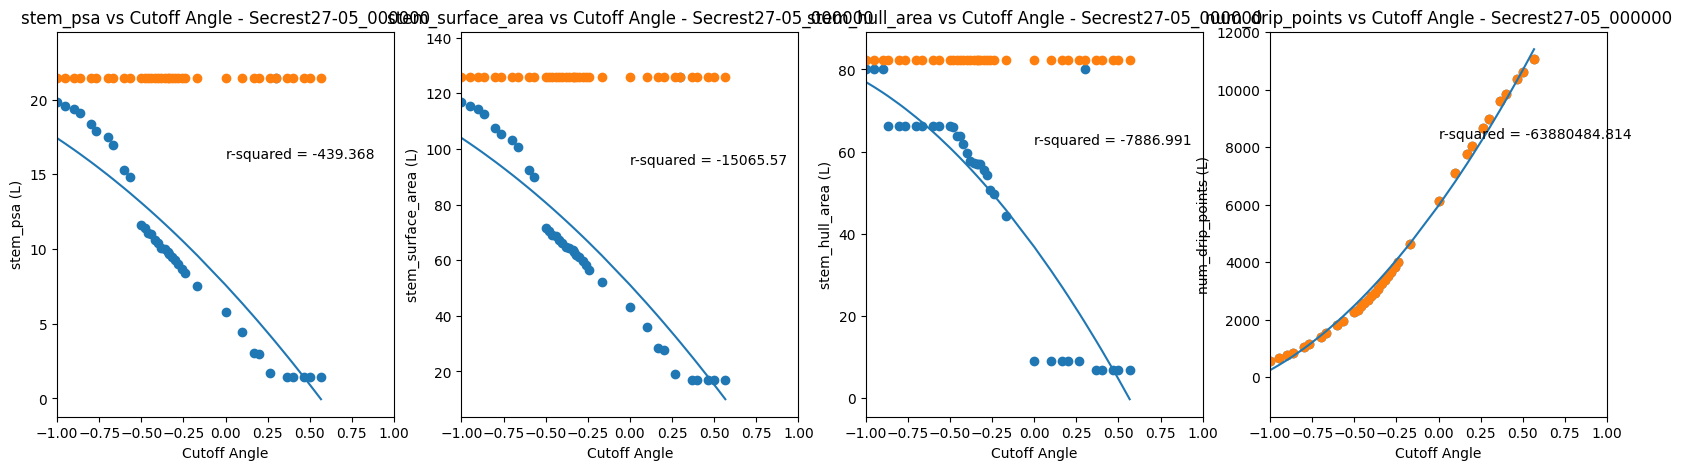

In [11]:
#plotting correlations basedon sensitivity analysis runs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
# Convert 'case_name' to numeric values and handle errors
all_tree_stats['case_name'] = pd.to_numeric(all_tree_stats['case_name'], errors='coerce')

# Sort the dataframe by 'case_name'
all_tree_stats = all_tree_stats.sort_values(by='case_name')

# Group the data by file name
grouped = all_tree_stats.groupby('file_name')

# fields = [('vol_over_ssa', 'vol_over_sps'), ('vol_over_sha', 'vol_over_ssa'), ('vol_over_ssa', 'vol_over_sha')] #, 'vol_over_dbh', 'vol_over_oza', 'vol_over_ota']

fields = [('stem_psa','total_psa'), ('stem_surface_area','tot_surface_area'), ('stem_hull_area','tot_hull_area'), ('num_drip_points','num_drip_points')]

new_file_names = set([file for file in all_tree_stats['file_name'] if '32' in file or '27' in file])
print(new_file_names)
# fields = ['stem_psa']
def plot_correlation(field:tuple):
    # For each group (file name), plot a line graph of case name vs vol_over_sps
     for file_name in new_file_names:
        fig, ax = plt.subplots(1,len(fields), figsize=(20, 5))
        # Replace 'your_file_name' with the actual file name you want to filter by
        filtered_df = all_tree_stats.loc[all_tree_stats['file_name'] == file_name ]
        for idx, field_tup in enumerate(fields):
            field, tot_field = field_tup
            plot = ax[idx]
            plot.set_title(f"{field} vs Cutoff Angle - {file_name}")
            plot.set_xlabel("Cutoff Angle")
            plot.set_ylabel(f"{field} (L)")
            plot.set_xlim([-1,1])
            x = filtered_df["case_name"]
            y = filtered_df[field]
            plot.scatter(x, y)

            tot_x = filtered_df["case_name"]
            tot_y = filtered_df[tot_field]
            plot.scatter(tot_x, tot_y)

            try:
                
                # x_flitered, y_predicted, rsq, fit_type, coeff = find_fit_func(
                #     quartic, np.array(x), np.array(y)
                # )

                # plot.annotate(
                #     f"r^2 = {rsq}, fit = {fit_type}",
                #     (0, np.max(y) * 0.9),
                # )
                # plot.plot(x_flitered, y_predicted)
            # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
                z = np.polyfit(x, y, 2)
                p = np.poly1d(z)
                y_predicted = p(x)
                rsq = round(r2_score(x, y_predicted), 3)

                ax[idx].annotate(
                    f"r-squared = {rsq}",
                    (0, np.max(y) * 0.75),
                )
                ax[idx].plot(x, y_predicted, )
            except Exception as e:
                print(f'r2 did not converge{e}')

            # ax[1].set_title(f"{field[1]} vs Cutoff Angle - {file_name}")
            # ax[1].set_xlabel("Cutoff Angle")
            # ax[1].set_ylabel(f"{field[1]} (L)")
            # x = filtered_df["case_name"]
            # y = filtered_df[field[1]]
            # ax[1].scatter(x, y)

            # # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
            # z = np.polyfit(x, y, 2)
            # p = np.poly1d(z)
            # y_predicted = p(x)
            # rsq = round(r2_score(y, y_predicted), 3)

            # ax[1].annotate(
            #     f"r-squared = {rsq}",
            #     (0, np.max(y) * 0.75),
            # )
            # ax[1].plot(x, y_predicted)
            
        # plt.show()

plot_correlation(fields)



In [76]:
# List of fields to calculate correlation with 'case_name'
fields = ['vol_over_tps', 'vol_over_sps', 'vol_over_tsa', 'vol_over_ssa', 'vol_over_tha', 'vol_over_sha', 'vol_over_dbh', 'vol_over_oza', 'vol_over_ota']

# Group the data by file name
grouped = all_tree_stats.groupby('file_name')

# Initialize an empty dictionary to store the correlation data
correlation_data = {}

# For each group (file name), calculate the correlation of 'case_name' with each field and store it in the dictionary
for name, group in grouped:
    for field in fields:
        correlation_data[name] = group['case_name'].corr(field)

# Convert the dictionary to a pandas dataframe
correlation_df = pd.DataFrame(correlation_data)

# Transpose the dataframe to have filenames as rows and fields as columns
correlation_df = correlation_df.transpose()

# Display the dataframe
print(correlation_df)
    
# Calculate and display summary statistics
summary_stats = correlation_df.describe()
print(summary_stats)
# vol_over_tps, vol_over_sps, vol_over_tsa, vol_over_ssa, vol_over_tha, vol_over_sha, vol_over_dbh, vol_over_oza, vol_over_ota

TypeError: unsupported type: <class 'str'>

In [146]:
# Adding some segemntattion colums 
print(type(volume_w_intensity['Intensity'].describe()))
print(volume_w_intensity['Intensity'].describe()['50%'])

lambda x,p: x>x.describe()[p]
volume_w_intensity["intensity_color"] = volume_w_intensity['Intensity'].map(lambda x: "r" if x>volume_w_intensity['Intensity'].describe()['50%'] else "b")
volume_w_intensity["intensity_color"] 


# print(depth.index.map(lambda x: date_fix_dict.get(x, x)))

# volume_w_intensity["intensity_color"] = volume_w_intensity[volume_w_intensity['Intensity']>volume_w_intensity['Intensity'].describe()['50%'] ]
# volume_w_intensity["intensity_color"] 

<class 'pandas.core.series.Series'>
1.5714045698924732


Date
2020-07-27    r
2020-07-28    b
2020-08-01    b
2020-08-01    b
2022-08-02    b
2020-08-03    r
2020-08-04    r
2020-08-05    b
2020-08-16    r
2020-08-17    b
2020-08-26    r
2020-08-27    r
2020-08-28    r
2020-05-09    b
2020-09-07    r
2020-09-09    b
2020-09-13    b
2020-09-28    r
2020-09-29    b
2020-10-01    b
2020-10-04    b
2022-09-06    b
2022-06-17    b
2022-07-07    b
2022-07-14    b
2022-07-19    b
2022-08-02    b
2022-08-11    b
2022-08-23    b
2022-10-09    b
2022-09-28    b
2022-10-15    b
2022-10-19    b
2022-11-02    b
2022-11-02    b
Name: intensity_color, dtype: object

In [56]:
# Excluding validation Data (mostly dates) that is unreliable
#

# rain_sorted_vol = rain_sorted_vol.loc[
#     rain_sorted_vol.index < datetime(2022, 1, 1)
# ]
# bad dates

test = rain_sorted_vol

date_fix_dict = {
    datetime(2020, 1, 8).strftime("YYY-MM-DD"): datetime(2020, 8, 1).strftime(
        "YYY-MM-DD"
    ),
    datetime(2020, 3, 8).strftime("YYY-MM-DD"): datetime(2020, 8, 3).strftime(
        "YYY-MM-DD"
    ),
    datetime(2020, 4, 8).strftime("YYY-MM-DD"): datetime(2020, 8, 4).strftime(
        "YYY-MM-DD"
    ),
    datetime(2020, 5, 8).strftime("YYY-MM-DD"): datetime(2020, 8, 5).strftime(
        "YYY-MM-DD"
    ),
    datetime(2020, 6, 8).strftime("YYY-MM-DD"): datetime(2020, 9, 6).strftime(
        "YYY-MM-DD"
    ),
    datetime(2020, 7, 9).strftime("YYY-MM-DD"): datetime(2020, 9, 7).strftime(
        "YYY-MM-DD"
    ),
    datetime(2020, 1, 10).strftime("YYY-MM-DD"): datetime(2020, 10, 1).strftime(
        "YYY-MM-DD"
    ),
    datetime(2020, 4, 10).strftime("YYY-MM-DD"): datetime(2020, 10, 4).strftime(
        "YYY-MM-DD"
    ),
    datetime(2022, 2, 8).strftime("YYY-MM-DD"): datetime(2022, 8, 2).strftime(
        "YYY-MM-DD"
    ),
    datetime(2022, 11, 8).strftime("YYY-MM-DD"): datetime(2022, 8, 11).strftime(
        "YYY-MM-DD"
    ),
    datetime(2022, 9, 10).strftime("YYY-MM-DD"): datetime(2022, 9, 10).strftime(
        "YYY-MM-DD"
    ),
}

print(rain_sorted_vol.index)
test["adjusted_date"] = date_fix_dict.get(rain_sorted_vol.index, rain_sorted_vol.index)
print(test["adjusted_date"])

NameError: name 'rain_sorted_vol' is not defined

KeyboardInterrupt: 

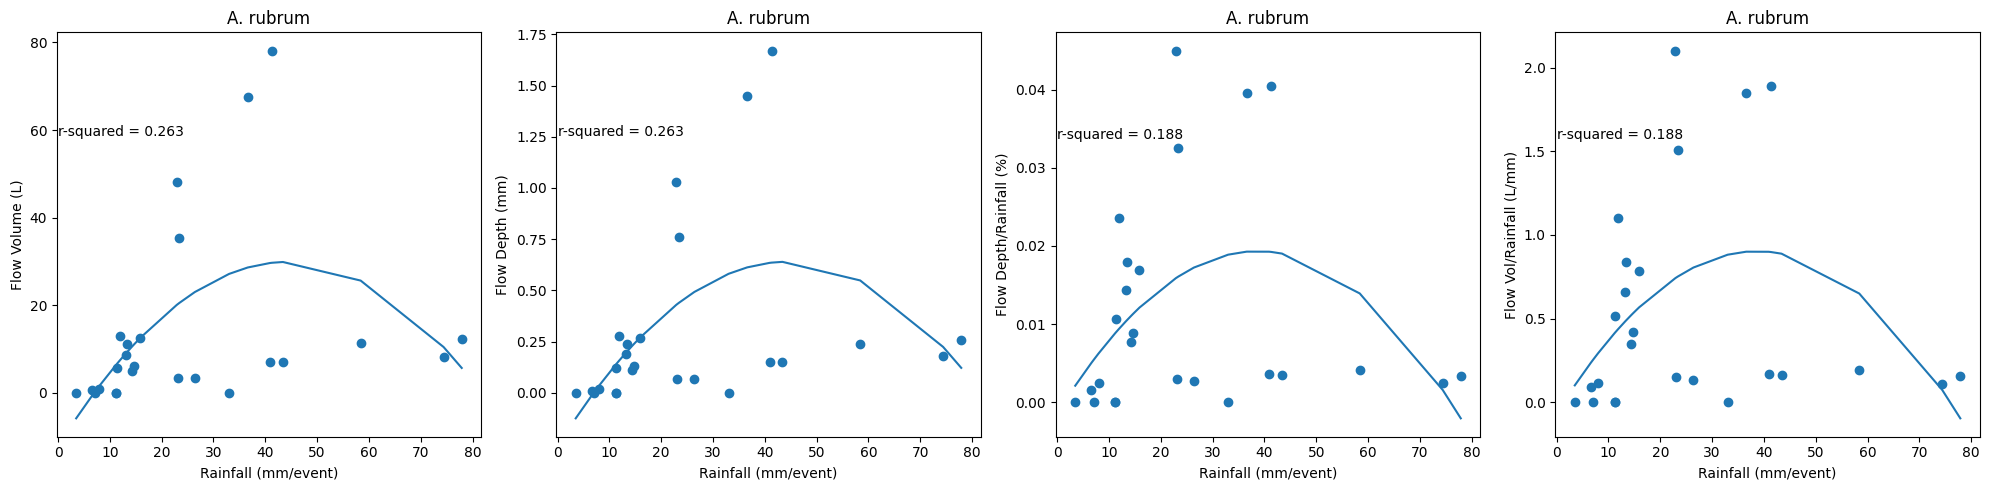

In [95]:
# Identification of saturation point
# How to define:
#   - By volume of rain required before consistent stem flow is seen
#       - By comparison of stem flow vol/yield of each rain event together for each tree individually
#       - Similar to the above but with time on X, stem flow volume on Y for indv rain events
#
# Viz wanted:
#   - Volume/rain depth/stemflow yield by rain amount

# tree_list = set(dataframes['Mapping']['Species'])
# print(tree_list)


import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


if 1 == 1:
    # for tree in tree_list:

    tree_name = "A. rubrum"
    tree_metrics = dataframes["Mapping"].loc[[tree_name]]

    # Creating the plots we are about to populate with data
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    # Populating one plot with data from the validation data set
    title = f"Stemflow Volume (L) by Rainfall Event - {tree_name}"
    ax[0].set_title(tree_name)
    ax[0].set_xlabel("Rainfall (mm/event)")
    ax[0].set_ylabel("Flow Volume (L)")
    x = rain_sorted_vol["Rain"]
    y = rain_sorted_vol[tree_name]
    ax[0].scatter(x, y)

    # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[0].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[0].plot(x, y_predicted)

    title = f"Stemflow Depth by Rainfall Event - {tree_name}"
    ax[1].set_title(tree_name)
    ax[1].set_xlabel("Rainfall (mm/event)")
    ax[1].set_ylabel("Flow Depth (mm)")
    x = rain_sorted_depth["Rain"]
    y = rain_sorted_depth[tree_name]
    ax[1].scatter(x, y)
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[1].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[1].plot(x, y_predicted)

    title = f"Stemflow Volume Yield by Rainfall Event - {tree_name}"
    ax[2].set_title(tree_name)
    ax[2].set_xlabel("Rainfall (mm/event)")
    ax[2].set_ylabel("Flow Depth/Rainfall (%)")
    x = rain_sorted_depth["Rain"]
    y = rain_sorted_depth[tree_name] / rain_sorted_depth["Rain"]
    ax[2].scatter(x, y)
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[2].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[2].plot(x, y_predicted)

    title = f"Stemflow Volume Yield by Rainfall Event - {tree_name}"
    ax[3].set_title(tree_name)
    ax[3].set_xlabel("Rainfall (mm/event)")
    ax[3].set_ylabel("Flow Vol/Rainfall (L/mm)")
    x = rain_sorted_vol["Rain"]
    y = rain_sorted_vol[tree_name] / rain_sorted_vol["Rain"]
    ax[3].scatter(x, y)
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    y_predicted = p(x)
    rsq = round(r2_score(y, y_predicted), 3)

    ax[3].annotate(
        f"r-squared = {rsq}",
        (0, np.max(y) * 0.75),
    )
    ax[3].plot(x, y_predicted)

    plt.savefig(
        "C:/Users/wisch/Documents/GitProjects/CanopyHydrodynamics/data/output/validation/A_Rubrum_vol_by_rain.png"
    )

    plt.show()

In [9]:
#defining our cross plots and correlation function finder
def gaussian(x, a, b, c):
    """
    Used for fitting data using an gaussian curve
    Functions as an input to scipy curve_fit
    """
    y = a * np.exp(-1 * b * x**2) + c
    return y


def exponential(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * np.exp(b * x) + c


def quadratic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * x * x + b * x + c


def cubic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return x * x * x + a * x * x + b * x + c


def logrithmic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """

    return a * np.log(b * x) + c


def try_fit_func(fit_func: Callable, x: arr, y: arr, *args):
    func_name = fit_func.__name__
    coeff = []
    try:
        coeff, pcov = curve_fit(fit_func, x, y)  # , p0 = (1,1,2))#, *args)
    except RuntimeError:
        print(f"No {func_name} fit found. {len(coeff)}")

    if len(coeff) == 0:
        y_predicted, rsq = None, None
    else:
        print(f"{func_name} fit found. coeff ={coeff}.")
        y_predicted = fit_func(x, *coeff)
        print(f"x {x}")
        print(f"y {y}")
        print(f"y_predicted {y_predicted}")
        rsq = round(r2_score(y, y_predicted), 3)
        print(f"rsq = {rsq}, args = {args}")
    return y_predicted, rsq, func_name, coeff


def find_fit_func(fit_func, x: arr, y: arr):
    alt_fit_funcs = [logrithmic, quadratic, gaussian, cubic]
    # x_flitered = x[~np.isnan(x)]
    # y_filtered = y[~np.isnan(x)]
    # x_flitered = x[x>0]
    # y_filtered = y[x>0]
    # x_flitered = x[y_filtered>.1]
    # y_filtered = y[y_filtered>.1]
    x_flitered = x
    y_filtered = y

    y_predicted, rsq, fit_func_name, coeff = try_fit_func(
        fit_func, x_flitered, y_filtered
    )

    for alt_func in alt_fit_funcs:
        if len(coeff) != 0 and rsq > 0.2:
            print(
                f"""fff returning:
                  ~np.isnan(x) {~np.isnan(x)} 
                    x {x},
                    x_flitered {x_flitered},
                    y {y},
                    y_filtered {y_filtered}, 
                    y_predicted {y_predicted}"""
            )
            return x_flitered, y_predicted, rsq, fit_func_name, coeff
        else:
            y_predicted, rsq, fit_func_name, coeff = try_fit_func(
                alt_func, x_flitered, y_filtered
            )

    if len(coeff) == 0 or rsq < 0.2:
        fit_func_name = "None"
        y_predicted = y_filtered

    print(f"fff returning: x_flitered {x_flitered}, y_predicted {y_predicted}")
    return x_flitered, y_predicted, rsq, fit_func_name, coeff


def add_plot(
    x, y, fit_func: Callable, plot, title="", xlabel="Rainfall (mm/event)", ylabel=""
):
    # Creating the plots we are about to populate with data

    # Populating one plot with data from the validation data set
    title = f"{title}"
    plot.set_title(title)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plot.scatter(x, y)
    # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
    x_flitered, y_predicted, rsq, fit_type, coeff = find_fit_func(
        fit_func, arr(x), arr(y)
    )

    plot.annotate(
        f"r^2 = {rsq}, fit = {fit_type}",
        (0, np.max(y) * 0.9),
    )
    plot.plot(x_flitered, y_predicted)
    return rsq, fit_type, coeff


def cross_plot(rows, cols, common_x, adj_denom=None, fit_func=quadratic):
    num_cols = len(cols) * 2 if adj_denom else len(cols)
    num_rows = len(rows)
    plt.rcParams["figure.autolayout"] = True

    _, ax = plt.subplots(num_rows, num_cols, figsize=(3 * num_cols, 3 * num_rows))
    fit_results = []
    for row_number, row_key in enumerate(rows):
        for col_number, col_metric in enumerate(cols):
            xlabel = common_x[0]
            ylabel = col_metric[0]
            title = f"{row_key}"

            print(f"Processing {row_key}, {ylabel}")

            rsq, fit_type, coeff = add_plot(
                x[1],
                col_metric[1][row_key],
                fit_func,
                ax[row_number, col_number],
                title,
                xlabel,
                ylabel,
            )
            fit_results.append((rsq, fit_type, coeff))
            if adj_denom:
                ylabel = f"{col_metric[0]} / {adj_denom[0]}"
                title = f"{row_key}"
                adj_col_num = col_number + len(cols)
                rsq, fit_type, coeff = add_plot(
                    x[1],
                    col_metric[1][row_key] / adj_denom[1],
                    fit_func,
                    ax[row_number, adj_col_num],
                    title,
                    xlabel,
                    ylabel,
                )
                fit_results.append((rsq, fit_type, coeff))
    plt.show()


# print(rain_sorted_vol)

# print(tree_keyed_data_sets[1][1]  ['T. cordata'])
# print(tree_keyed_data_sets[1][1]['T. cordata'][len(tree_keyed_data_sets[1][1]['T. cordata'])])
# fit_result = cross_plot(
#     rows=keys,
#     cols=tree_keyed_data_sets,
#     common_x=x,
#     adj_denom=adjustment_denominator,
#     fit_func=exponential,
# )

# print(fit_result)
# plt.savefig('C:/Users/wisch/Documents/GitProjects/CanopyHydrodynamics/data/output/validation/munge_test_sort_nan_gr_3_mm_no_r_filter.png')


In [ ]:

x = ("Rain (mm)", rain_sorted_vol["Rain"])
tree_keyed_data_sets = [
    ("Flow Volume (L)", rain_sorted_depth),
]
# ("Flow Depth (mm)",rain_sorted_depth),]
labels = []
adjustment_denominator = x
# tree list
keys = dataframes["Mapping"].index

#cross plotting validation data
fit_result = cross_plot(
    rows=keys,
    cols=tree_keyed_data_sets,
    common_x=x,
    adj_denom=adjustment_denominator,
    fit_func=exponential,
)


In [ ]:
#cross plotting sensitivity analysis data
x = ("Cutoff Angle", rain_sorted_vol["Rain"])
tree_keyed_data_sets = [
    ("Flow Volume (L)", rain_sorted_depth),
]
# ("Flow Depth (mm)",rain_sorted_depth),]
labels = []
adjustment_denominator = x
# tree list
keys = dataframes["Mapping"].index

#cross plotting validation data
fit_result = cross_plot(
    rows=keys,
    cols=tree_keyed_data_sets,
    common_x=x,
    adj_denom=adjustment_denominator,
    fit_func=exponential,
)

In [118]:
# adjustment_denominator = None

# rain = rain_sorted_vol['Rain']
# x=('Rain (mm)',rain_sorted_vol['Rain'])
# tree_keyed_data_sets = [("Flow Volume (L)",rain_sorted_vol),]
#                         # ("Flow Depth (mm)",rain_sorted_depth),]
# labels = []
# tree_list = dataframes['Mapping'].index

# print(dataframes['Mapping'].loc[['Z. serrata']])

# num = pd.DataFrame({'circle': [4, 4, 4],'triangle': [6, 6, 6],'rectangle': [5, 5, 5]},
#                      index=['a', 'b', 'c'])
# denom = [2,3,5]

# print(num)
# print(num.div(denom))

# print(rain_sorted_vol)
# print(dataframes['Mapping'])


tot_psa = dataframes["Mapping"]["total_psa"].T
stem_psa = dataframes["Mapping"]["stem_psa"].T

tot_surface_area = dataframes["Mapping"]["tot_surface_area"].T
stem_surface_area = dataframes["Mapping"]["stem_surface_area"].T

tot_hull_area = dataframes["Mapping"]["tot_hull_area"].T
stem_hull_area = dataframes["Mapping"]["stem_hull_area"].T

dbh = dataframes["Mapping"]["DBH"].T

Order_zero_angle_avg = dataframes["Mapping"]["Order_zero_angle_avg"].T
Order_two_angle_avg = dataframes["Mapping"]["Order_two_angle_avg"].T

# # print(tot_psa,stem_psa,tot_hull_area,stem_hull_area)

vol_over_tpsa = rain_sorted_vol.div(tot_psa)
vol_over_spsa = rain_sorted_vol.div(stem_psa)
vol_over_tsa = rain_sorted_vol.div(tot_surface_area)
vol_over_ssa = rain_sorted_vol.div(stem_surface_area)
vol_over_tha = rain_sorted_vol.div(tot_hull_area)
vol_over_sha = rain_sorted_vol.div(stem_hull_area)

vol_over_dbh = rain_sorted_vol.div(dbh)

vol_over_oza = rain_sorted_vol.div(Order_zero_angle_avg)
vol_over_ota = rain_sorted_vol.div(Order_two_angle_avg)

# print(tot_psa)
# print(vol_over_tpsa)
# print([col[1].max()[] for col in [('Vol/Tot. PSA' ,vol_over_tpsa),]])


print(vol_over_tpsa["A. platanoides"][vol_over_tpsa["A. platanoides"] > 0])
# (vol_over_spsa
# (vol_over_tha
# (vol_over_sha )

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]
fit_bounds[-100, (100, 100, 100)]


C:\Users\wisch\AppData\Local\Temp\ipykernel_2120\2611310612.py:49: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


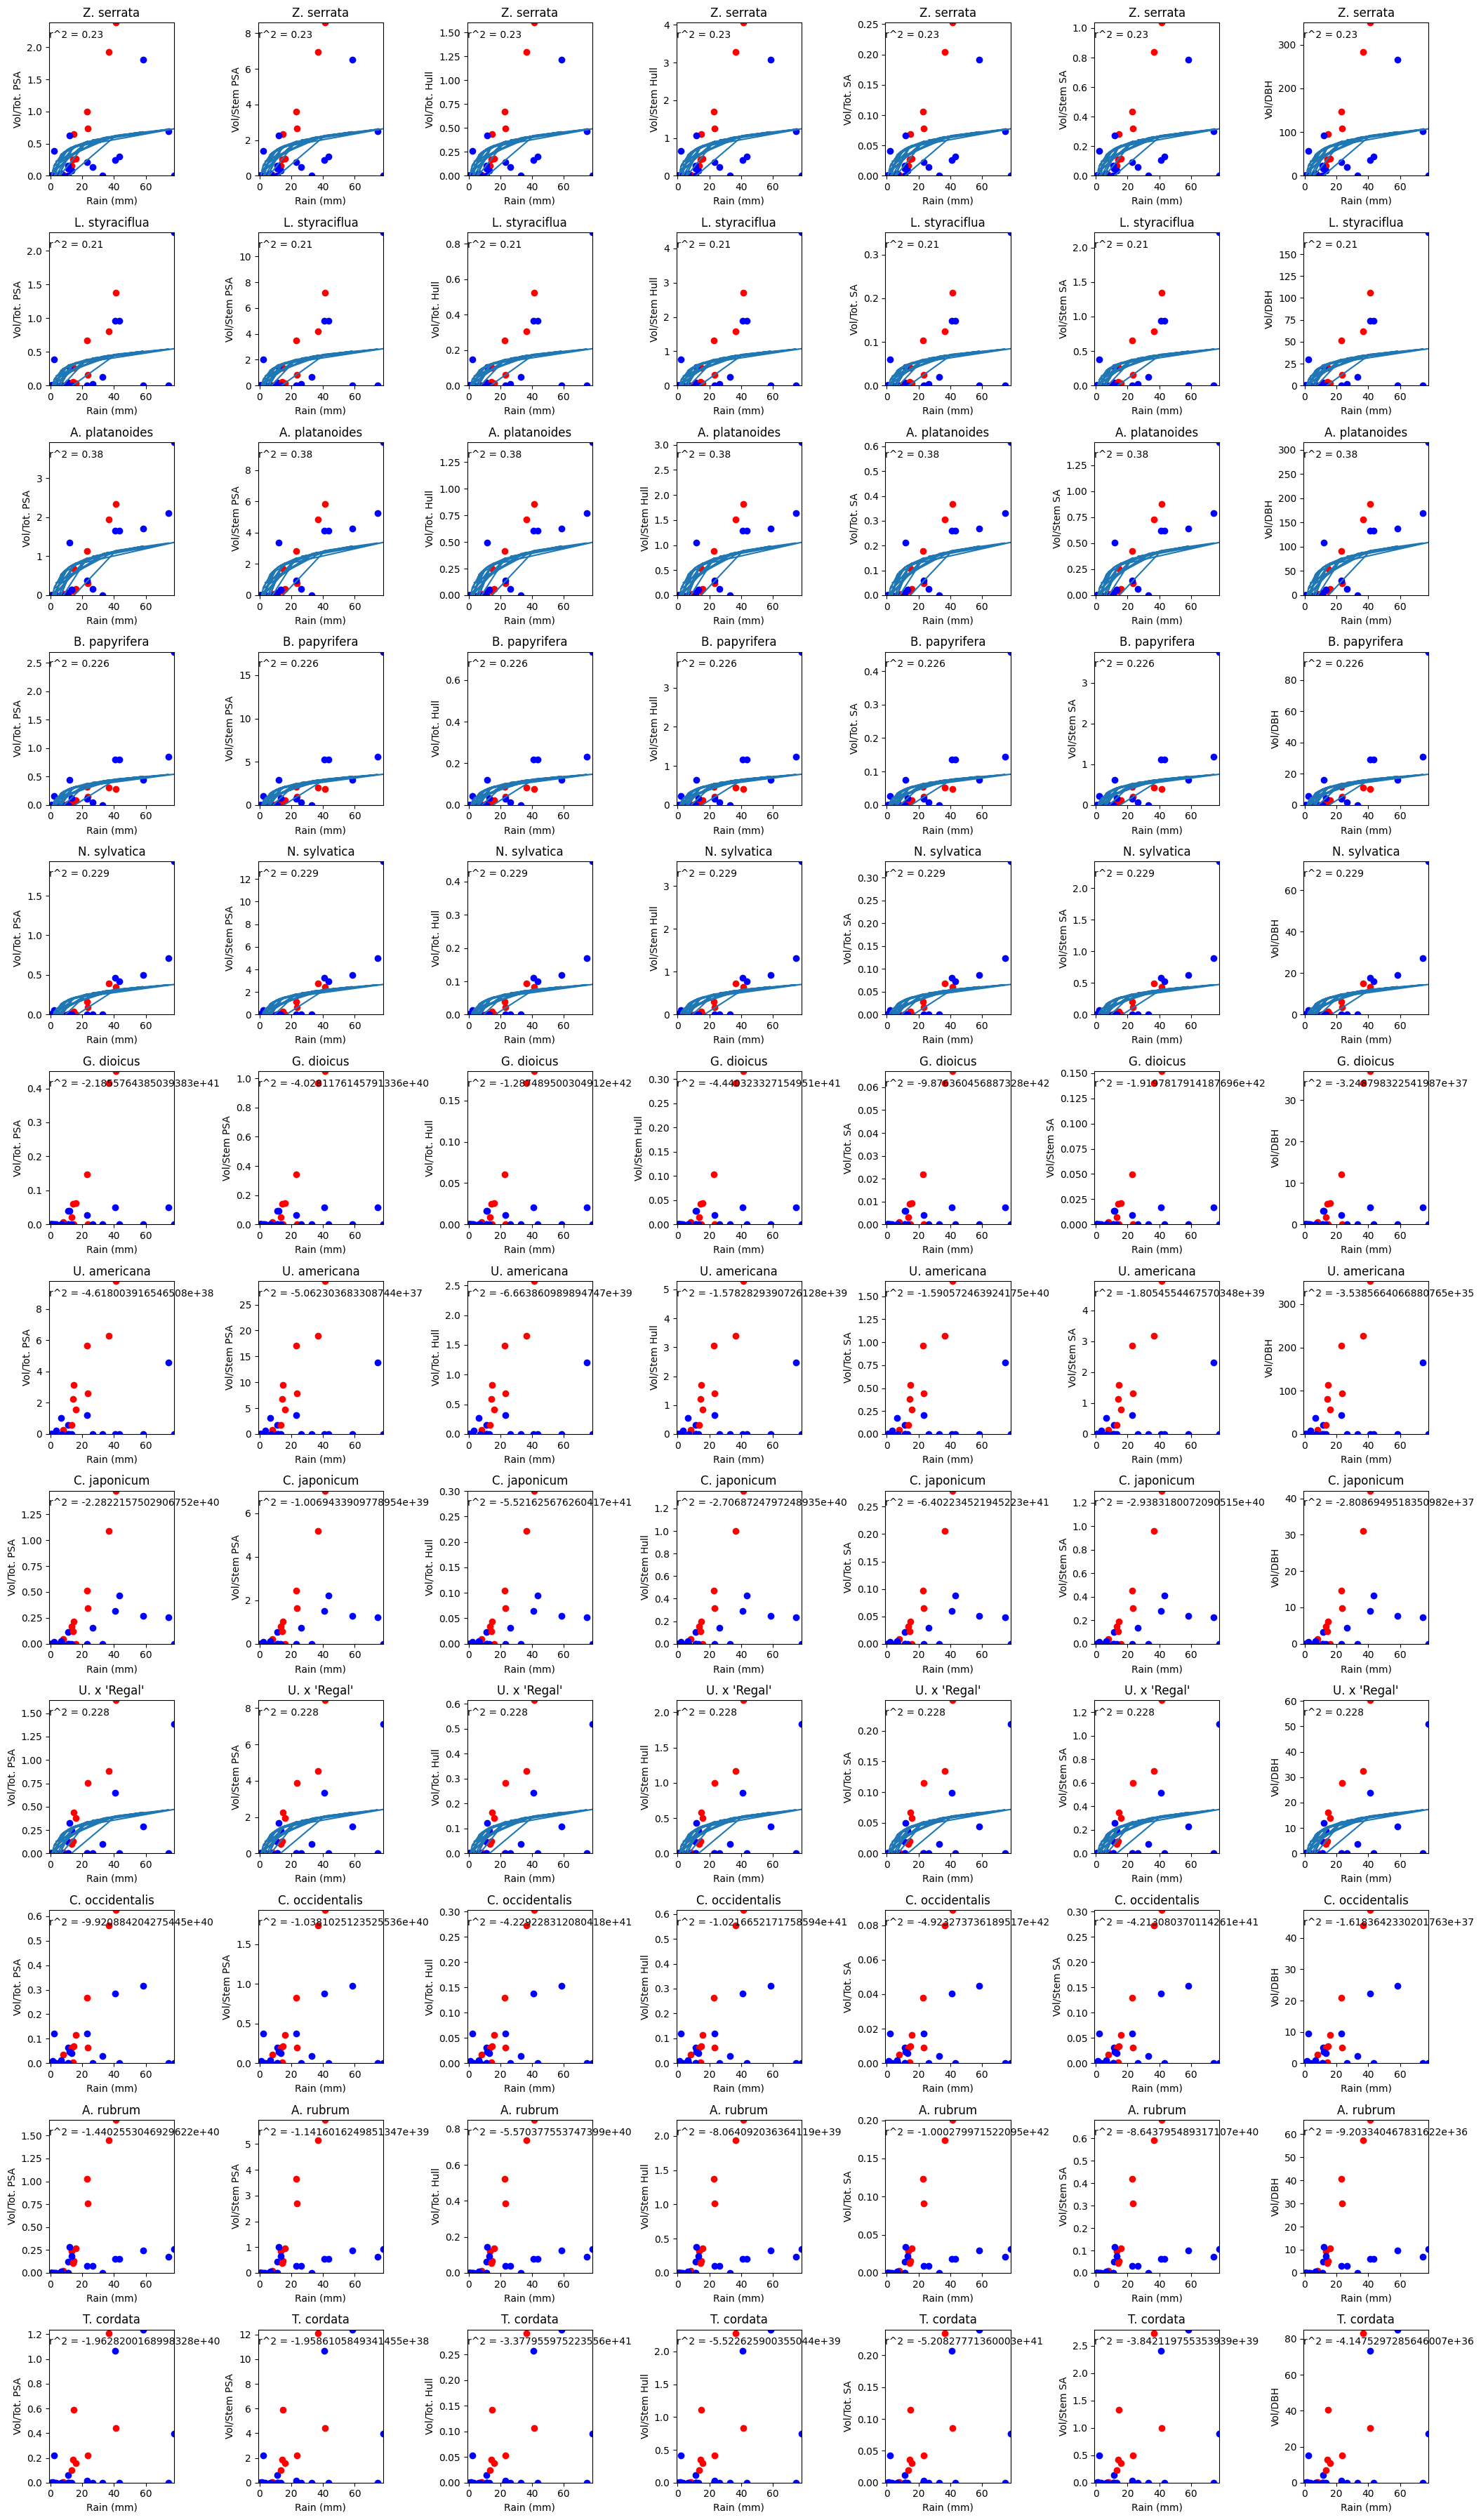

In [147]:
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def gaussian(x, a, b, c):
    """
    Used for fitting data using an gaussian curve
    Functions as an input to scipy curve_fit
    """
    y = a * np.exp(-1 * b * x**2) + c
    return y


def exponential(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * np.exp(b * x) + c


def quadratic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return a * x * x + b * x + c


def cubic(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """
    return x * x * x + a * x * x + b * x + c


def natural_log(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """

    return a * np.log(b * x) + c


def general_log(x, a, b, c):
    """
    Used for fitting data using a general exponential curve
    Functions as an input to scipy curve_fit
    """

    return a * np.emath.logn(b, x) + c


def try_fit_func(fit_func: Callable, x: arr, y: arr, *args):
    func_name = fit_func.__name__
    coeff = []
    if fit_func in ["general_log", "exponential"]:
        bounds = [0.01, (100, 100, 100)]
    if fit_func in ["natural_log"]:
        bounds = [0.01, (100, 4, 100)]
    else:
        bounds = [-100, (100, 100, 100)]
    print(f"fit_bounds{bounds}")
    try:
        coeff, pcov = curve_fit(fit_func, x, y)  # , p0 = (1,1,2))#, *args)
    except RuntimeError:
        print(f"No {func_name} fit found. {len(coeff)}")

    if len(coeff) == 0:
        y_predicted, rsq = None, None
    else:
        # print(f'{func_name} fit found. coeff ={coeff}. x = {x}')
        try:
            y_predicted = fit_func(x, *coeff)
        except RuntimeWarning:
            print(f"Err: x {x}, coeff: {coeff} ")
        # print(f'x {x}')
        # print(f'y {y}')
        # print(f'y_predicted {y_predicted}')
        rsq = round(r2_score(y, y_predicted), 3)
        # print(f'rsq = {rsq}, args = {args}')
    return y_predicted, rsq, func_name, coeff


def find_fit_func(fit_func, x: arr, y: arr):
    alt_fit_funcs = [exponential, natural_log, quadratic, general_log, gaussian, cubic]
    # x_flitered = x[~np.isnan(x)]
    # y_filtered = y[~np.isnan(x)]
    x_flitered = x[x > 0]
    y_filtered = y[x > 0]
    # x_flitered = x[y_filtered>.1]
    # y_filtered = y[y_filtered>.1]
    # x_flitered = x
    # y_filtered = y

    y_predicted, rsq, fit_func_name, coeff = try_fit_func(
        fit_func, x_flitered, y_filtered
    )

    for alt_func in alt_fit_funcs:
        if len(coeff) != 0 and (rsq > 0.2 or rsq < -0.2):
            # print(f'''fff returning:
            #       ~np.isnan(x) {~np.isnan(x)}
            #         x {x},
            #         x_flitered {x_flitered},
            #         y {y},
            #         y_filtered {y_filtered},
            #         y_predicted {y_predicted}''')
            return x_flitered, y_predicted, rsq, fit_func_name, coeff
        else:
            y_predicted, rsq, fit_func_name, coeff = try_fit_func(
                alt_func, x_flitered, y_filtered
            )

    if len(coeff) == 0 or (rsq < 0.2 and rsq > -0.2):
        fit_func_name = "None"
        y_predicted = y_filtered

    # print(f'fff returning: x_flitered {x_flitered}, y_predicted {y_predicted}')
    return x_flitered, y_predicted, rsq, fit_func_name, coeff


def add_plot(
    x,
    y,
    fit_func: Callable,
    plot,
    bounds,
    title="",
    xlabel="Rainfall (mm/event)",
    ylabel="",
    col_map = None
):
    # Creating the plots we are about to populate with data

    # Populating one plot with data from the validation data set
    title = f"{title}"
    plot.set_title(title)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plot.set(xlim=bounds[0], ylim=bounds[1])
    
    for idx, (yi, col) in enumerate(zip(y,col_map)):
        plot.scatter(x.iloc[idx], yi, color= col)
    # Calculating a line of best fit (and its r-squared) to add to the above referenced chart
    x_flitered, y_predicted, rsq, fit_type, coeff = find_fit_func(
        fit_func, arr(x), arr(y)
    )

    plot.annotate(
        f"r^2 = {rsq}",
        xy=(bounds[0][0], bounds[1][1] * 0.9),
    )
    plot.plot(x_flitered, y_predicted)
    return rsq, fit_type, coeff


def cross_plot(rows, cols, common_x, fit_func=quadratic, col_map = None):
    num_cols = len(cols)
    num_rows = len(rows)
    plt.rcParams["figure.autolayout"] = True

    _, ax = plt.subplots(num_rows, num_cols, figsize=(3 * num_cols, 3 * num_rows))
    fit_results = []
    xmax = x[1].max()
    xmin = x[1].min() - 1
    for row_number, row_key in enumerate(rows):
        # ymin = np.max([col_metric[1][row_key].min() for col_metric in cols])
        # ymax = np.max([col_metric[1][row_key].max() for col_metric in cols])
        # Pdb().set_trace()
        for col_number, col_metric in enumerate(cols):
            ymin = col_metric[1][row_key].min()
            ymax = col_metric[1][row_key].max()
            bounds = ((xmin, xmax), (ymin, ymax))
            xlabel = common_x[0]
            ylabel = col_metric[0]
            title = f"{row_key}"

            # print(f'Processing {row_key}, {ylabel}')
            # print(f'bounds {bounds}')

            rsq, fit_type, coeff = add_plot(
                x[1],
                col_metric[1][row_key],
                fit_func,
                ax[row_number, col_number],
                bounds,
                title,
                xlabel,
                ylabel,
                col_map = col_map
            )
            fit_results.append((rsq, fit_type, coeff))


x = ("Rain (mm)", volume_w_intensity["Rain"])
color_col= volume_w_intensity["intensity_color"]


import matplotlib.cm as cm

# col_map = cm.rainbow(volume_w_intensity["Intensity"]/volume_w_intensity["Intensity"].max())
col_map = volume_w_intensity["intensity_color"]
# tree list
keys = dataframes["Mapping"].index

ys = [
    ("Vol/Tot. PSA", vol_over_tpsa),
    ("Vol/Stem PSA", vol_over_spsa),
    ("Vol/Tot. Hull", vol_over_tha),
    ("Vol/Stem Hull", vol_over_sha),
    (
        "Vol/Tot. SA",
        vol_over_tsa,
    ),
    (
        "Vol/Stem SA",
        vol_over_ssa,
    ),
    (
        "Vol/DBH",
        vol_over_dbh,
    ),
]

# print(volume_w_intensity)

fit_result = cross_plot(rows=keys, cols=ys, common_x=x, fit_func=exponential, col_map =col_map )

# print(fit_result)
# plt.savefig('C:/Users/wisch/Documents/GitProjects/CanopyHydrodynamics/data/output/validation/munge_test_sort_nan_gr_3_mm_no_r_filter.png')
plt.show()